# What is a Pixel and what is an Image?

<div>
<iframe src="https://slides.com/naresh-ub/cvip-lec-1/embed" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div>

Images are made up of [pixels](https://en.wikipedia.org/wiki/Pixel#:~:text=In%20digital%20imaging%2C%20a%20pixel,can%20be%20manipulated%20through%20software), small units that represent the intensity or color at specific coordinates. Each pixel can be a single grayscale value or a tuple of values for color channels like RGB. In scientific computing and computer vision, images are typically stored as NumPy arrays: 2D arrays for grayscale images and 3D arrays (height × width × channels) for color images. This structured representation allows efficient numerical manipulation, making NumPy a powerful foundation for image processing, filtering, and machine learning applications.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

def plot_digit_image_and_values(image, label):
    """
    Plots a grayscale digit image on the left,
    and a table of pixel values on the right.
    """
    # Format pixel values as strings with 2 digits
    pixel_text = np.vectorize(lambda x: f"{int(x):02d}")(image)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Plot the image on the left
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title(f'Digit Image (Label: {label})')
    axes[0].axis('off')

    # Plot the pixel values on the right as a square table
    axes[1].axis('off')
    table = axes[1].table(
        cellText=pixel_text,
        loc='center',
        cellLoc='center'
    )
    table.scale(1, 1.5)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

## Images are simple NumPy Arrays

The code below reads an image from `sklearn.datasets.load_digits` and displays that the images are stored as `numpy arrays`.

```{admonition} Utilize the Live Code feature in the website
:class: tip
Each code cell throughout this website is **interactive**. For example, you can run/edit the code cell below. Simply using the {fa}`rocket` icon on top of the page and click "Live Code".
```

Type of image: <class 'numpy.ndarray'>
Shape of image: (8, 8)


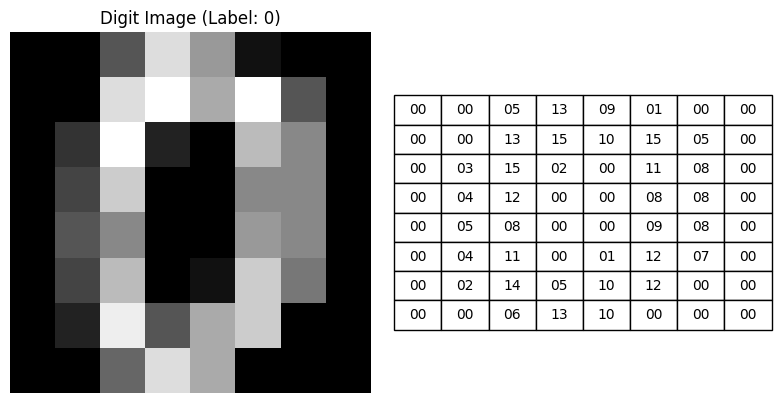

In [ ]:
# Load the digits dataset
digits = load_digits()

index = 0 # Try changing this
image = digits.images[index]

print("Type of image:", type(image))
print("Shape of image:", image.shape)

label = digits.target[index]

# Plot using the utility function
plot_digit_image_and_values(image, label)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook
from PIL import Image

def plot_image(image, title='Image'):
    """
    Plots a given image using matplotlib with no axes and a title.
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

Type of PIL image: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Type of image: <class 'numpy.ndarray'>
Shape of image: (600, 512, 3)


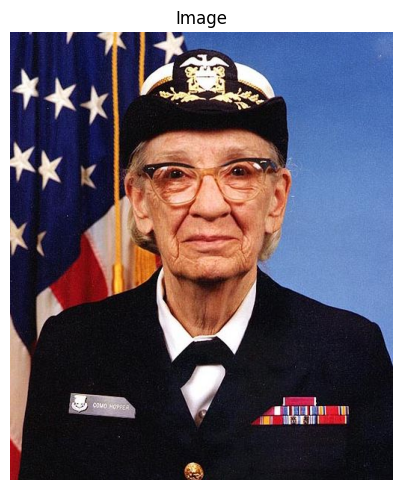

In [24]:
with cbook.get_sample_data('grace_hopper.jpg') as image_file:
    pil_image = Image.open(image_file)
    print("Type of PIL image:", type(pil_image))
    image = np.array(pil_image)

print("Type of image:", type(image))
print("Shape of image:", image.shape)

plot_image(image, title='Image')

## Let's create new images programmatically

Now that we know images are just NumPy arrays, we can create and manipulate images programmatically by directly modifying these arrays. Each element in the array corresponds to a pixel, so by setting specific values, we can draw shapes, patterns, or even generate entirely synthetic images from scratch. Using libraries like NumPy for array manipulation and Matplotlib for visualization, we can treat the image as a canvas and write code to “programmatically paint” on it, opening the door to procedural art, simulations, and custom data visualizations.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grayscale_image(image, title='Grayscale Image'):
    """
    Plots a grayscale image (2D NumPy array) using matplotlib.
    """
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

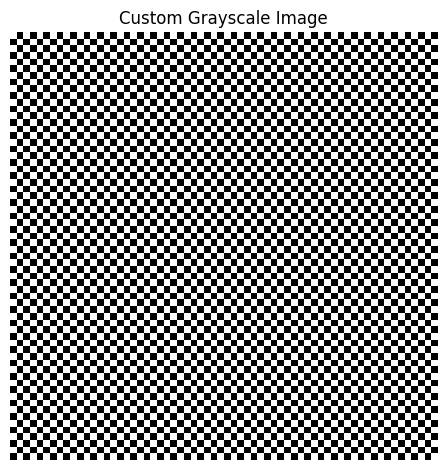

In [ ]:
size = 64
image = np.zeros((size, size), dtype=np.uint8)

## Play around with the image
for i in range(size):
    for j in range(size):
        if (i + j) % 2 == 0:
            image[i, j] = 255  # Set pixel to white
        else:
            image[i, j] = 0    # Set pixel to black
# Plot the image
plot_grayscale_image(image, title="Custom Grayscale Image")

Let's generate some Procedural Art using functions.

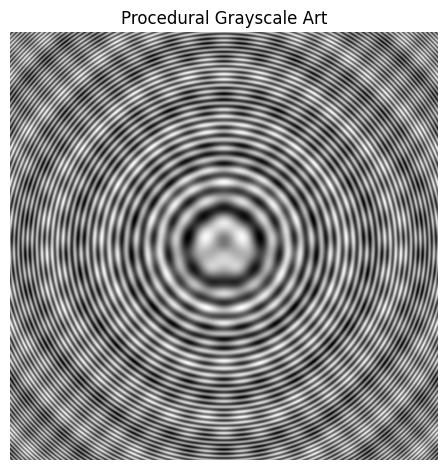

In [25]:
# Create a 1024x1024 image
size = 1024
x = np.linspace(-4 * np.pi, 4 * np.pi, size)
y = np.linspace(-4 * np.pi, 4 * np.pi, size)
X, Y = np.meshgrid(x, y)

# Complex pattern using sine, cosine, radial symmetry, and decay
Z = (
    np.sin(X**2 + Y**2) +
    0.5 * np.cos(3 * X) * np.sin(3 * Y) +
    0.3 * np.sin(np.sqrt(X**2 + Y**2) * 2)
)

# Normalize to [0, 255]
Z_normalized = 255 * (Z - Z.min()) / (Z.max() - Z.min())
image = Z_normalized.astype(np.uint8)

# Plot the result
plot_grayscale_image(image, title='Procedural Grayscale Art')

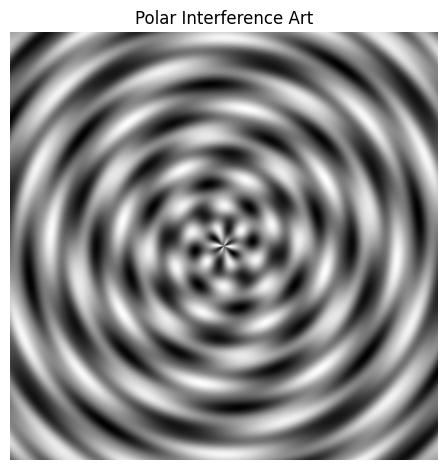

In [26]:
# Create a 1024x1024 image
size = 1024
x = np.linspace(-2, 2, size)
y = np.linspace(-2, 2, size)
X, Y = np.meshgrid(x, y)

# Convert to polar coordinates
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Generate complex interference pattern with swirl + decay
Z = (
    np.sin(20 * R + 4 * Theta) +
    np.cos(8 * R - 6 * Theta) +
    0.2 * np.sin(40 * R)
)

# Normalize to [0, 255]
Z_normalized = 255 * (Z - Z.min()) / (Z.max() - Z.min())
image = Z_normalized.astype(np.uint8)

# Plot the result
plot_grayscale_image(image, title='Polar Interference Art')

In [39]:
# === Utility Cell ===
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Plotting function
def plot_rgb_image(image, title='Generated RGB Art'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Draw filled circle on image
def draw_circle(img, center, radius, color):
    yy, xx = np.ogrid[:img.shape[0], :img.shape[1]]
    mask = (yy - center[1])**2 + (xx - center[0])**2 <= radius**2
    img[mask] = color

# Normalize image channel to [0, 255]
def normalize(channel):
    return ((channel - channel.min()) / (channel.max() - channel.min()) * 255).astype(np.uint8)

def generate_smiley():
    size = 512
    image = np.ones((size, size, 3), dtype=np.uint8) * 255  # white background

    # Face
    draw_circle(image, center=(256, 256), radius=200, color=[255, 221, 51])  # Yellow face
    draw_circle(image, center=(196, 200), radius=20, color=[0, 0, 0])        # Left eye
    draw_circle(image, center=(316, 200), radius=20, color=[0, 0, 0])        # Right eye

    # Smile
    theta = np.linspace(0, np.pi, 300)
    x = (np.cos(theta) * 100 + 256).astype(np.int32)
    y = (np.sin(theta) * 50 + 280).astype(np.int32)
    image[y, x] = [0, 0, 0]

    return image

def generate_irregular_rgb():
    size = 1024
    x = np.linspace(-3 * np.pi, 3 * np.pi, size)
    y = np.linspace(-3 * np.pi, 3 * np.pi, size)
    X, Y = np.meshgrid(x, y)

    R = np.sin(X * Y / (np.abs(Y) + 1)) + np.cos(Y * 1.5)
    G = np.sin(X + np.cos(Y * 2)) * np.cos(X * Y)
    B = np.cos(1.5 * X * np.sin(Y)) + np.sin(X * 0.5 + Y * 0.5)

    return np.stack([normalize(R), normalize(G), normalize(B)], axis=-1)

def generate_circular_rgb():
    size = 1024
    x = np.linspace(-3 * np.pi, 3 * np.pi, size)
    y = np.linspace(-3 * np.pi, 3 * np.pi, size)
    X, Y = np.meshgrid(x, y)

    R = np.sin(X**2 + Y**2)
    G = np.cos(X) * np.sin(Y)
    B = np.sin(2 * np.sqrt(X**2 + Y**2) + Y)

    return np.stack([normalize(R), normalize(G), normalize(B)], axis=-1)

# Master function to control mode
def show_image(interactive_mode=True):
    options = {
        "Smiley": generate_smiley,
        "Irregular RGB Art": generate_irregular_rgb,
        "Circular RGB Art": generate_circular_rgb
    }

    if not interactive_mode:
        img = generate_smiley()
        plot_rgb_image(img, title='Smiley')
    else:
        dropdown = widgets.Dropdown(
            options=list(options.keys()),
            value="Smiley",
            description='Select Art:',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='300px')
        )

        output = widgets.Output()

        def on_change(change):
            if change['type'] == 'change' and change['name'] == 'value':
                output.clear_output(wait=True)
                with output:
                    img = options[change['new']]()
                    plot_rgb_image(img, title=change['new'])

        dropdown.observe(on_change)

        # Initial plot
        with output:
            plot_rgb_image(options[dropdown.value](), title=dropdown.value)

        display(dropdown, output)

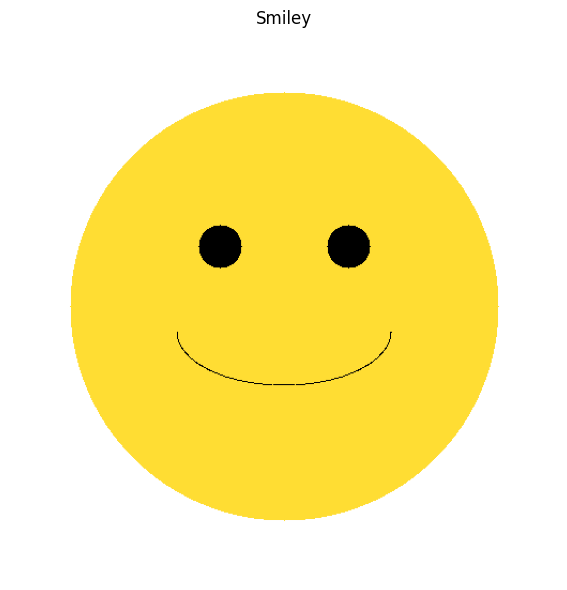

In [ ]:
show_image(interactive_mode=True)